In [35]:
import pandas as pd
import numpy as np
import pdfplumber
import re
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [14]:
#test first page
pdf = pdfplumber.open("pdfs-2015-to-2019 (Population)/Tpop1d1807.pdf")
page = pdf.pages[0]

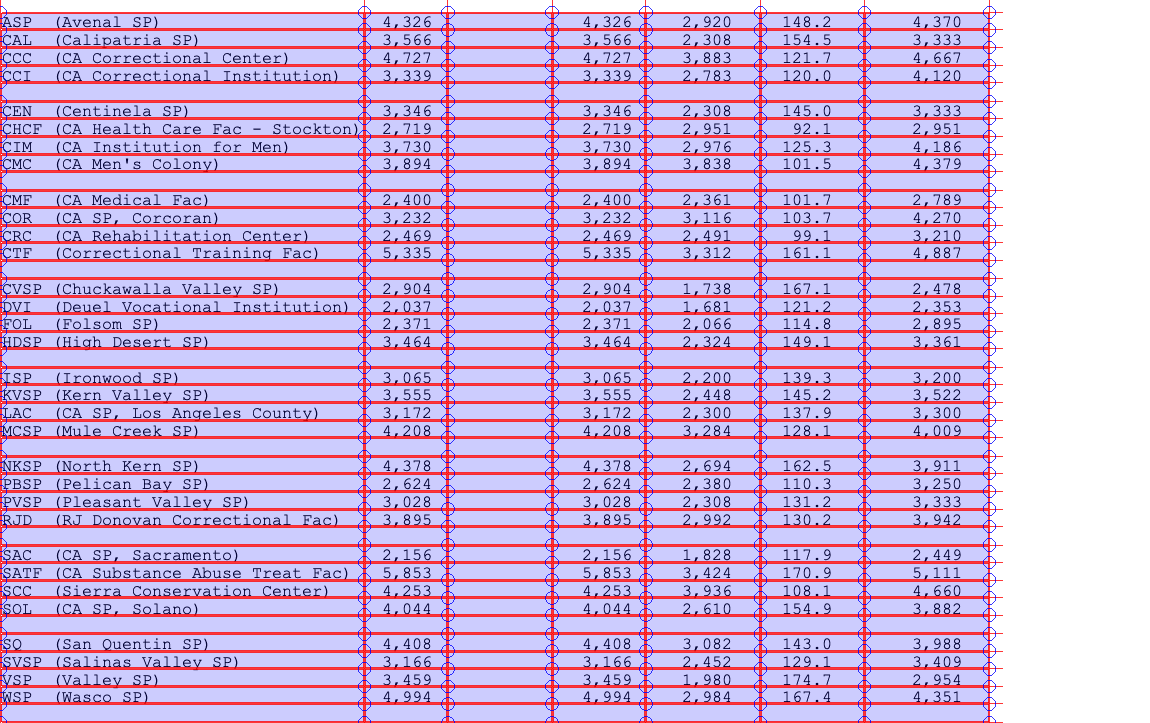

In [4]:
#set up vertical lines, which it can't find on its own
table_settings_for_2015_2018={
    "horizontal_strategy": "text",
    "vertical_strategy": "explicit",
    "explicit_vertical_lines": [60, 235, 275, 325, 370, 425, 475, 535]
}

table_settings_for_2019={
    "horizontal_strategy": "text",
    "vertical_strategy": "explicit",
    "explicit_vertical_lines": [34, 340, 390, 450, 520, 564]
}

#(x0, top, x1, bottom)
crop_settings_2015_2018=(60, 115, page.width, page.height - 330)
crop_settings_2019=(25, 180, page.width, page.height - 265)
crop = page.crop(crop_settings_2015_2018)

im = crop.to_image(resolution=150)
im.reset().debug_tablefinder(table_settings_for_2015_2018)

In [16]:
crop = page.crop(crop_settings_2015_2018)
crop.extract_table(table_settings_for_2015_2018)

[['ASP (Avenal SP)', '4,326', '', '4,326', '2,920', '148.2', '4,370'],
 ['CAL (Calipatria SP)', '3,566', '', '3,566', '2,308', '154.5', '3,333'],
 ['CCC (CA Correctional Center)',
  '4,727',
  '',
  '4,727',
  '3,883',
  '121.7',
  '4,667'],
 ['CCI (CA Correctional Institution)',
  '3,339',
  '',
  '3,339',
  '2,783',
  '120.0',
  '4,120'],
 ['', '', '', '', '', '', ''],
 ['CEN (Centinela SP)', '3,346', '', '3,346', '2,308', '145.0', '3,333'],
 ['CHCF (CA Health Care Fac - Stockton)',
  '2,719',
  '',
  '2,719',
  '2,951',
  '92.1',
  '2,951'],
 ['CIM (CA Institution for Men)',
  '3,730',
  '',
  '3,730',
  '2,976',
  '125.3',
  '4,186'],
 ["CMC (CA Men's Colony)", '3,894', '', '3,894', '3,838', '101.5', '4,379'],
 ['', '', '', '', '', '', ''],
 ['CMF (CA Medical Fac)', '2,400', '', '2,400', '2,361', '101.7', '2,789'],
 ['COR (CA SP, Corcoran)', '3,232', '', '3,232', '3,116', '103.7', '4,270'],
 ['CRC (CA Rehabilitation Center)',
  '2,469',
  '',
  '2,469',
  '2,491',
  '99.1',
  '3,21

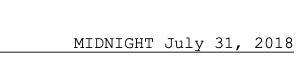

In [5]:
date_2015_2018 = page.crop((400, 20, 545, 50))
#date_2019 = page.crop((305, 90, 410, 96))
ik = date_2015_2018.to_image(resolution=150)
ik.reset().debug_tablefinder()



In [6]:
regex1 = date_2015_2018.extract_text().replace("_", "")
regex2 = re.sub(r'\s*MIDNIGHT\s?', r'', regex1)
regex2


'July 31, 2018'

In [92]:
columns = [
    "Institution",
    "Institution Name",
    "Total",
    "Design Capacity",
    "Percent Occupied",
    "Staffed Capacity",
    "Date",
    "Month",
    "Year"
]

df = pd.DataFrame(columns=columns)


pdf_collection = [
    {
        # For PDF files 2015 to 2018
        'table_settings': {
            "horizontal_strategy": "text",
            "vertical_strategy": "explicit",
            "explicit_vertical_lines": [60, 235, 275, 325, 370, 425, 475, 535]
        },
        'crop_settings': lambda pagewidth, pageheight: (60, 115, pagewidth, pageheight - 330),
        'date_location': (400, 20, 545, 50),
        'regex_find_institution': r'^([A-Z]{2,4})\s.*?$',
        'files': [
            "Tpop1d1501.pdf",
            "Tpop1d1502.pdf",
            "Tpop1d1503.pdf",
            "Tpop1d1504.pdf",
            "Tpop1d1505.pdf",
            "Tpop1d1506.pdf",
            "Tpop1d1507.pdf",
            "Tpop1d1508.pdf",
            "Tpop1d1509.pdf",
            "Tpop1d1510.pdf",
            "Tpop1d1511.pdf",
            "Tpop1d1512.pdf",
            "Tpop1d1601.pdf",
            "Tpop1d1602.pdf",
            "Tpop1d1603.pdf",
            "Tpop1d1604.pdf",
            "Tpop1d1605.pdf",
            "Tpop1d1606.pdf",
            "Tpop1d1607.pdf",
            "Tpop1d1608.pdf",
            "Tpop1d1609.pdf",
            "Tpop1d1610.pdf",
            "Tpop1d1611.pdf",
            "Tpop1d1612.pdf",
            "Tpop1d1701.pdf",
            "Tpop1d1702.pdf",
            "Tpop1d1703.pdf",
            "Tpop1d1704.pdf",
            "Tpop1d1705.pdf",
            "Tpop1d1706.pdf",
            "Tpop1d1707.pdf",
            "Tpop1d1708.pdf",
            "Tpop1d1709.pdf",
            "Tpop1d1710.pdf",
            "Tpop1d1711.pdf",
            "Tpop1d1712.pdf",
            "Tpop1d1801.pdf",
            "Tpop1d1802.pdf",
            "Tpop1d1803.pdf",
            "Tpop1d1804.pdf",
            "Tpop1d1805.pdf",
            "Tpop1d1806.pdf",
            "Tpop1d1807.pdf",
            "Tpop1d1808.pdf",
            "Tpop1d1809.pdf",
            "Tpop1d1810.pdf",
            "Tpop1d1811.pdf",
            "Tpop1d1812.pdf",
            "Tpop1d1901.pdf",
            "Tpop1d1902.pdf",
            "Tpop1d1903.pdf"
        ]
    },
    {
        # For PDF files 2019
        'table_settings':{
            "horizontal_strategy": "text",
            "vertical_strategy": "explicit",
            "explicit_vertical_lines": [34, 340, 390, 450, 520, 564]
        },
        'crop_settings': lambda pagewidth, pageheight: (25, 180, pagewidth, pageheight - 265),
        'date_location': (303, 90, 410, 96),
        'regex_find_institution': r'^.*?\(([A-Z]{2,4})\).*?$',
        'files': [
            "Tpop1d1904.pdf",
            "Tpop1d1905.pdf",
            "Tpop1d1906.pdf",
            "Tpop1d1907.pdf",
            "Tpop1d1908.pdf",
            "Tpop1d1909.pdf",
            "Tpop1d1910.pdf",
            "Tpop1d1911.pdf",
            "Tpop1d1912.pdf"
        ]
    }
]

def parse_value(x):
    if x == "": return np.nan
    return x.replace(",", "").replace('\n',' ')

def parse_row(row):
    return {columns[i]:parse_value(cell) for i, cell in enumerate(row)}


index = 0

for pdf_files in pdf_collection:

    for pdfs in pdf_files['files']:
        pdf   = pdfplumber.open("pdfs-2015-to-2019 (Population)/" + pdfs)
        page  = pdf.pages[0]
        crop  = page.crop(pdf_files['crop_settings'](page.width, page.height))
        table = crop.extract_table(pdf_files['table_settings'])
 
        #Extract Date
        date  = page.crop(pdf_files['date_location'])
        date  = date.extract_text()
        date  = re.sub(r'_', '', date)
        date  = re.sub(r'\s*MIDNIGHT\s*', r'', date)
        date  = re.sub(r'^h?t\s', r'', date)
        date_object = datetime.strptime(date, "%B %d, %Y")
        month = date_object.strftime("%b")
        year  = date_object.strftime("%Y")
     
        
        for row in table:
            if row[0] != '':
                row_without_civil_felon = row if len(row) !=7 else row[:1] + row[3:]
                institution_code  = re.sub(pdf_files['regex_find_institution'], r'\1', row_without_civil_felon[0])

                row_without_civil_felon.extend([date, month, year])
                row_without_civil_felon.insert(0, institution_code)
                row_as_object = [ {columns[i]: parse_value(cell)  for i, cell in enumerate(row_without_civil_felon) } ]
   
                df = pd.concat([df, pd.DataFrame(row_as_object)], ignore_index=True)
                
        
df

,Institution,Institution Name,Total,Design Capacity,Percent Occupied,Staffed Capacity,Date,Month,Year
0,ASP,ASP (Avenal SP),4064,2920,139.2,4702,January 31 2015,Jan,2015
1,CAL,CAL (Calipatria SP),3747,2308,162.3,3883,January 31 2015,Jan,2015
2,CCC,CCC (CA Correctional Center),4462,3883,114.9,4872,January 31 2015,Jan,2015
3,CCI,CCI (CA Correctional Institution),4189,2783,150.5,4414,January 31 2015,Jan,2015
4,CEN,CEN (Centinela SP),3215,2308,139.3,3433,January 31 2015,Jan,2015
...,...,...,...,...,...,...,...,...,...
1915,SOL,California State Prison Solano (SOL),4356,2610,166.9,3882,December 31 2019,Dec,2019
1916,SQ,San Quentin State Prison (SQ),4161,3082,135.0,3984,December 31 2019,Dec,2019
1917,SVSP,Salinas Valley State Prison (SVSP),2946,2452,120.1,3409,December 31 2019,Dec,2019
1918,VSP,Valley State Prison (VSP),2951,1980,149.0,2954,December 31 2019,Dec,2019


In [96]:
df_reduced = df[['Institution','Year','Month','Total']].rename(columns={'Total':'Inmate Count'})
df_reduced

,Institution,Year,Month,Inmate Count
0,ASP,2015,Jan,4064
1,CAL,2015,Jan,3747
2,CCC,2015,Jan,4462
3,CCI,2015,Jan,4189
4,CEN,2015,Jan,3215
...,...,...,...,...
1915,SOL,2019,Dec,4356
1916,SQ,2019,Dec,4161
1917,SVSP,2019,Dec,2946
1918,VSP,2019,Dec,2951


In [98]:
df_reduced.to_csv("finished-csvs/finished-2015-2019-POPULATION.csv", encoding="utf-8", index=False)